In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
train = pd.read_csv('bank-full.csv',sep=";")

In [3]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
train.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [5]:
print(train.columns.values)

['age' 'job' 'marital' 'education' 'default' 'balance' 'housing' 'loan'
 'contact' 'day' 'month' 'duration' 'campaign' 'pdays' 'previous'
 'poutcome' 'y']


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
train.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
train.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
train = train.drop(['contact'], axis=1)

In [10]:
train.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,5,may,198,1,-1,0,unknown,no


In [11]:
from sklearn.preprocessing import LabelEncoder
label_enc  = LabelEncoder()
train['marital']= label_enc.fit_transform(train['marital'])
train.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,1,tertiary,no,2143,yes,no,5,may,261,1,-1,0,unknown,no
1,44,technician,2,secondary,no,29,yes,no,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,1,secondary,no,2,yes,yes,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,1,unknown,no,1506,yes,no,5,may,92,1,-1,0,unknown,no
4,33,unknown,2,unknown,no,1,no,no,5,may,198,1,-1,0,unknown,no


In [12]:
from sklearn.preprocessing import LabelEncoder
label_enc  = LabelEncoder()
train['job']= label_enc.fit_transform(train['job'])
train.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,tertiary,no,2143,yes,no,5,may,261,1,-1,0,unknown,no
1,44,9,2,secondary,no,29,yes,no,5,may,151,1,-1,0,unknown,no
2,33,2,1,secondary,no,2,yes,yes,5,may,76,1,-1,0,unknown,no
3,47,1,1,unknown,no,1506,yes,no,5,may,92,1,-1,0,unknown,no
4,33,11,2,unknown,no,1,no,no,5,may,198,1,-1,0,unknown,no


In [13]:
from sklearn.preprocessing import LabelEncoder
label_enc  = LabelEncoder()
train['default']= label_enc.fit_transform(train['default'])
train.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,tertiary,0,2143,yes,no,5,may,261,1,-1,0,unknown,no
1,44,9,2,secondary,0,29,yes,no,5,may,151,1,-1,0,unknown,no
2,33,2,1,secondary,0,2,yes,yes,5,may,76,1,-1,0,unknown,no
3,47,1,1,unknown,0,1506,yes,no,5,may,92,1,-1,0,unknown,no
4,33,11,2,unknown,0,1,no,no,5,may,198,1,-1,0,unknown,no


In [14]:
from sklearn.preprocessing import LabelEncoder
label_enc  = LabelEncoder()
train['education']= label_enc.fit_transform(train['education'])
train.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,yes,no,5,may,261,1,-1,0,unknown,no
1,44,9,2,1,0,29,yes,no,5,may,151,1,-1,0,unknown,no
2,33,2,1,1,0,2,yes,yes,5,may,76,1,-1,0,unknown,no
3,47,1,1,3,0,1506,yes,no,5,may,92,1,-1,0,unknown,no
4,33,11,2,3,0,1,no,no,5,may,198,1,-1,0,unknown,no


In [15]:
from sklearn.preprocessing import LabelEncoder
label_enc  = LabelEncoder()
train['housing']= label_enc.fit_transform(train['housing'])
train.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,no,5,may,261,1,-1,0,unknown,no
1,44,9,2,1,0,29,1,no,5,may,151,1,-1,0,unknown,no
2,33,2,1,1,0,2,1,yes,5,may,76,1,-1,0,unknown,no
3,47,1,1,3,0,1506,1,no,5,may,92,1,-1,0,unknown,no
4,33,11,2,3,0,1,0,no,5,may,198,1,-1,0,unknown,no


In [16]:
from sklearn.preprocessing import LabelEncoder
label_enc  = LabelEncoder()
train['loan']= label_enc.fit_transform(train['loan'])
train.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,5,may,261,1,-1,0,unknown,no
1,44,9,2,1,0,29,1,0,5,may,151,1,-1,0,unknown,no
2,33,2,1,1,0,2,1,1,5,may,76,1,-1,0,unknown,no
3,47,1,1,3,0,1506,1,0,5,may,92,1,-1,0,unknown,no
4,33,11,2,3,0,1,0,0,5,may,198,1,-1,0,unknown,no


In [17]:
from sklearn.preprocessing import LabelEncoder
label_enc  = LabelEncoder()
train['month']= label_enc.fit_transform(train['month'])
train.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,5,8,261,1,-1,0,unknown,no
1,44,9,2,1,0,29,1,0,5,8,151,1,-1,0,unknown,no
2,33,2,1,1,0,2,1,1,5,8,76,1,-1,0,unknown,no
3,47,1,1,3,0,1506,1,0,5,8,92,1,-1,0,unknown,no
4,33,11,2,3,0,1,0,0,5,8,198,1,-1,0,unknown,no


In [18]:
from sklearn.preprocessing import LabelEncoder
label_enc  = LabelEncoder()
train['poutcome']= label_enc.fit_transform(train['poutcome'])
train.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,5,8,261,1,-1,0,3,no
1,44,9,2,1,0,29,1,0,5,8,151,1,-1,0,3,no
2,33,2,1,1,0,2,1,1,5,8,76,1,-1,0,3,no
3,47,1,1,3,0,1506,1,0,5,8,92,1,-1,0,3,no
4,33,11,2,3,0,1,0,0,5,8,198,1,-1,0,3,no


In [19]:
X = train.drop('y',axis=1)
Y = train['y']

In [20]:
print(X.shape)
print(Y.shape)

(45211, 15)
(45211,)


In [21]:
X_train, X_test, Y_train, Y_test = train_test_split (X,Y,test_size=0.3)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(31647, 15)
(31647,)
(13564, 15)
(13564,)


In [22]:
logreg = LogisticRegression()

In [23]:
logreg.fit(X_train,Y_train)

C:\Users\Ashutosh Mahajan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
Y_pred = logreg.predict(X_test)

In [25]:
print(Y_pred)

['no' 'no' 'no' ... 'no' 'no' 'no']


In [26]:
scoreLR = accuracy_score(Y_test,Y_pred)

In [27]:
print("Score ="+str(scoreLR*100)+"%")

Score =89.04452963727513%


In [28]:
svc= SVC()
svc.fit(X_train,Y_train)
Y_pred= svc.predict(X_test)

scoreSVC = accuracy_score(Y_test,Y_pred)
print("Accuracy Score : "+str(scoreLR*100)+"%")

C:\Users\Ashutosh Mahajan\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy Score : 89.04452963727513%


In [29]:

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)

scoreKNN = accuracy_score(Y_test, Y_pred)
print("Accuracy score: " + str(scoreKNN * 100) + "%")

Accuracy score: 87.42258920672367%


In [30]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)

scoreGNB = accuracy_score(Y_test, Y_pred)
print("Accuracy score: " + str(scoreGNB * 100) + "%")

Accuracy score: 85.46888823355943%


In [31]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

scoreSGD = accuracy_score(Y_test, Y_pred)
print("Accuracy score: " + str(scoreSGD * 100) + "%")

Accuracy score: 86.8843998820407%


In [32]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)

scoreDT = accuracy_score(Y_test, Y_pred)
print("Accuracy score: " + str(scoreDT * 100) + "%")

Accuracy score: 87.06133883810085%


In [33]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)

scoreRF = accuracy_score(Y_test, Y_pred)
print("Accuracy score: " + str(scoreRF * 100) + "%")


Accuracy score: 90.35682689472132%


In [34]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Stochastic Gradient Decent', 'Decision Tree'],
    'Score': [scoreSVC, scoreKNN, scoreLR, 
              scoreRF, scoreGNB, scoreSGD, scoreDT]})


models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,0.903568
2,Logistic Regression,0.890445
0,Support Vector Machines,0.881377
1,KNN,0.874226
6,Decision Tree,0.870613
5,Stochastic Gradient Decent,0.868844
4,Naive Bayes,0.854689


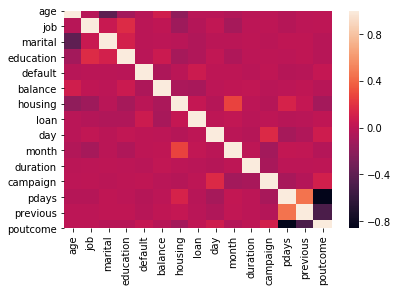

In [35]:
sns.heatmap(train.corr())